### Corey Lang

#### CS4630_Assignment #6: Machine Learning

# Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import load_iris #Iris dataset
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


# Loading data

In [2]:
iris_X, iris_y = load_iris(return_X_y=True)

In [3]:
print(iris_y.shape)

(150,)


In [4]:
print(iris_X.shape)

(150, 4)


# Splitting Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=1)

# Building Decision Tree Model and testing accuracy

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{cm}")

Accuracy: 95.56%
Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


### Visualizing Decision Trees

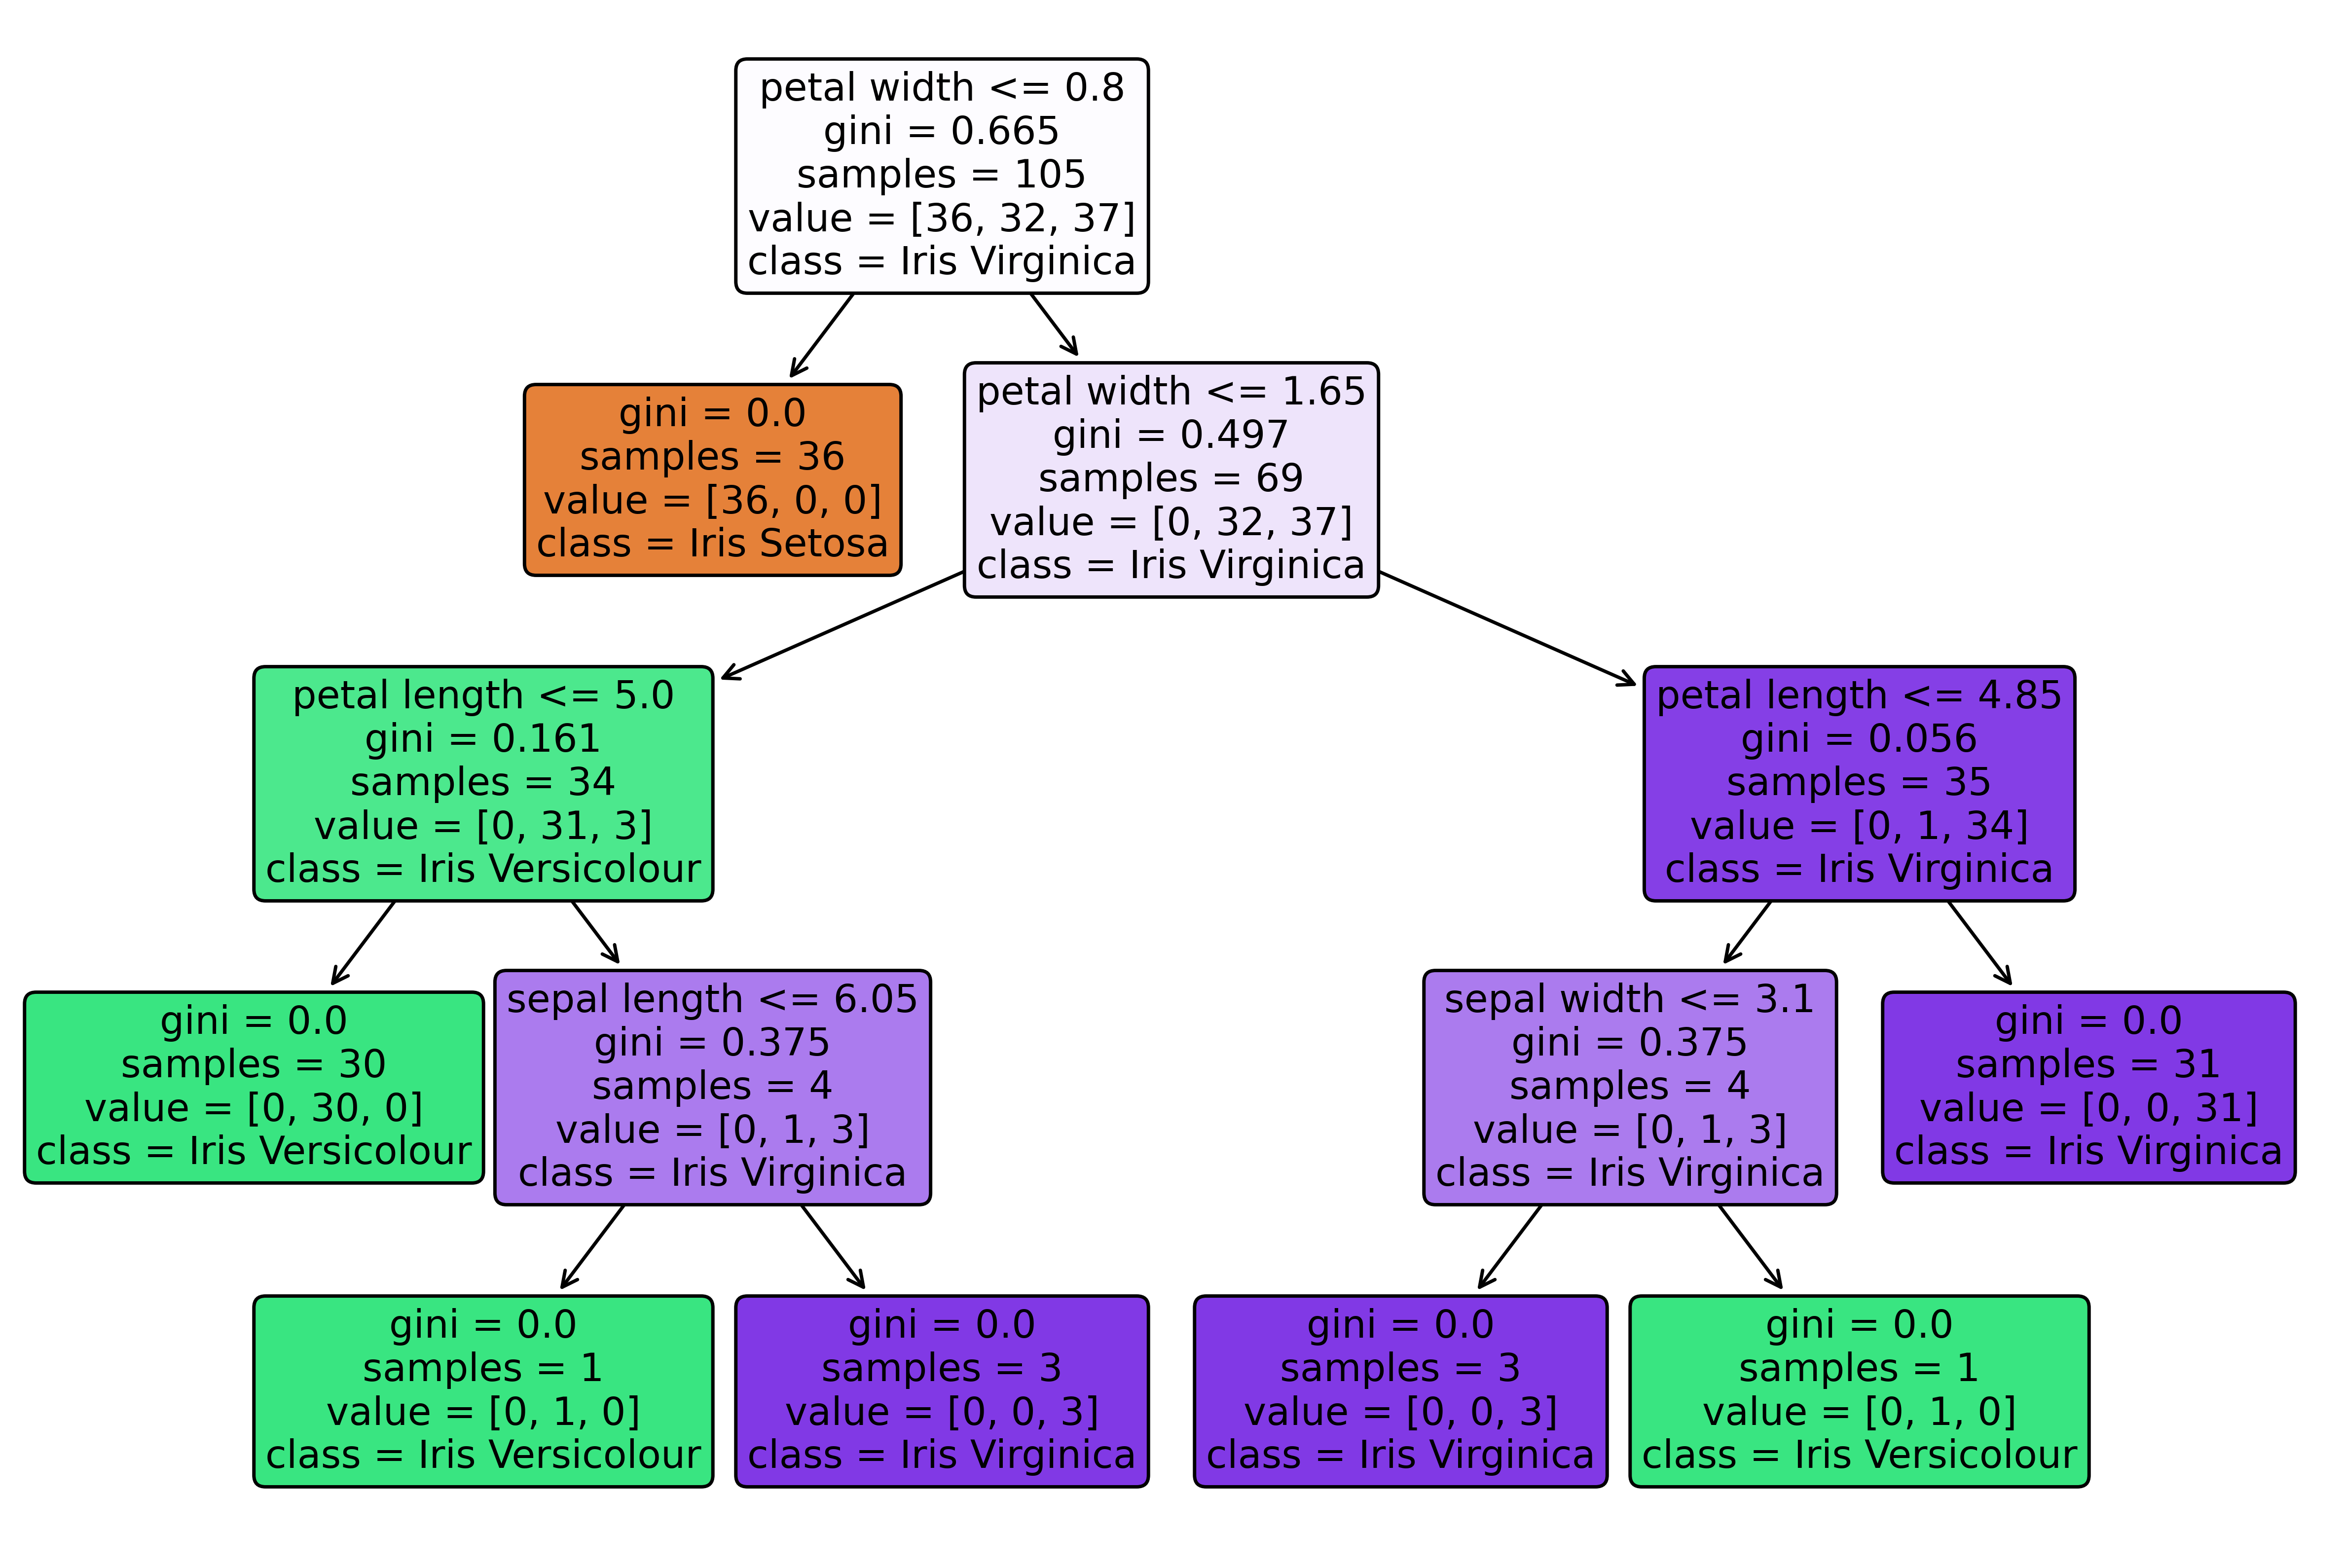

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8), dpi=500)
tree.plot_tree(clf,
               feature_names=["sepal length", "sepal width", "petal length", "petal width"],
               class_names=["Iris Setosa", "Iris Versicolour", "Iris Virginica"],
               filled=True,
               rounded=True);
plt.show()

## Discussion

The purpose of this study was to build a decision tree model to classify the iris plant species based on their features. When testing the accuracy of the model with the metrics.accuracy_score, the resutls came to 95.56% which means that the model has a 95% chance to predict the type of iris when given the dimensions of the petal and septal. The model used a 70/30 split which means that 70% of the data was used to make the model and the unused 30% was tested for accuracy. The confusion matrix summarizes the performance of the model by showing the number of true positives, true negatives, false positives, and false negatives. From the confusion matrix, 14 instances of the setosa species were predicted correctly with 0 mis-predictions. 17 instances of the versicolor species were predicted correctly with 1 instance being mis-predicted as a virginica species. 12 instances of the virginica species were predicted correctly with 1 instance being mis-predicted as a versicolor species. This result could conclude that the virginica species and versicolor species have similar properties compared to the setosa specices.

# Load data to new set for k_nearest

In [9]:
# load the iris data to play with
iris_knearest = load_iris()

# we only take the first two features.
X = iris_knearest.data[:, :2]
y = iris_knearest.target

## Visualization for colors

In [10]:
# visualization settings

h = 0.02 # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["lightpink", "dodgerblue", "blueviolet"])
cmap_bold = ["deeppink", "blue", "indigo"]

## Building K_nearest_neighbor Model and testing accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy (weights = 'uniform'): 77.78%
Confusion matrix (weights = 'uniform'):
[[19  0  0]
 [ 0  6  7]
 [ 0  3 10]]
Accuracy (weights = 'distance'): 75.56%
Confusion matrix (weights = 'distance'):
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]


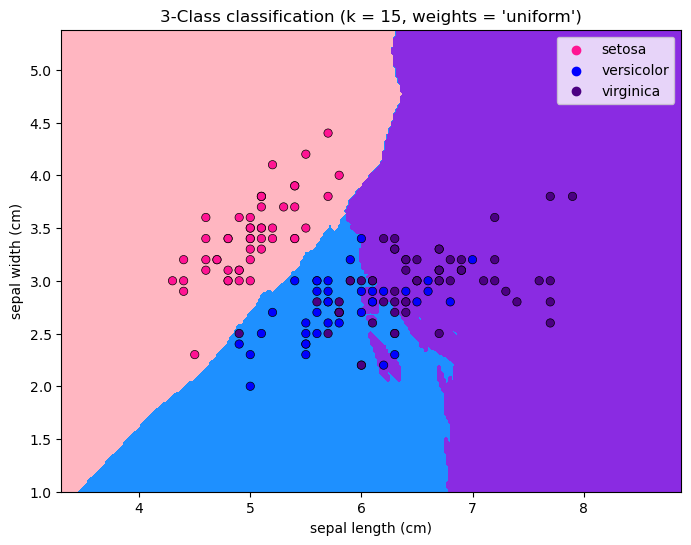

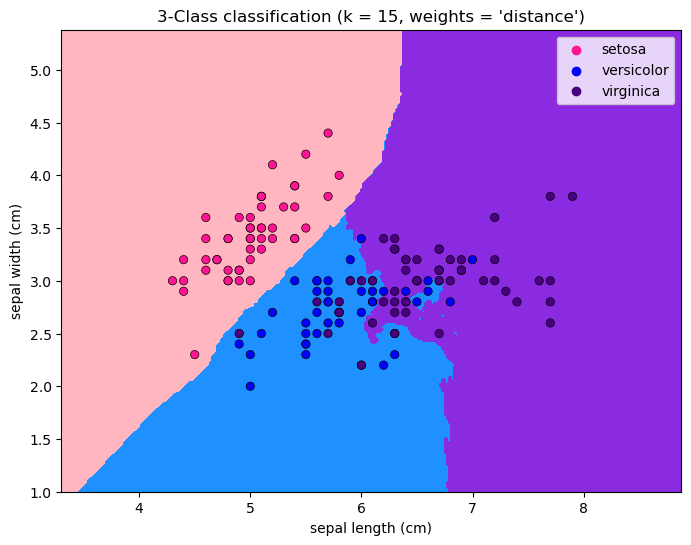

In [11]:
# number of neighbors
n_neighbors = 15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for weights in ["uniform", "distance"]:
    # Create an instance of the Neighbours Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    # Calculate the accuracy
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy (weights = '{weights}'): {accuracy * 100:.2f}%")

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    # Plot the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris_knearest.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.xlabel(iris_knearest.feature_names[0])
    plt.ylabel(iris_knearest.feature_names[1])
    
    # confusion_matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix (weights = '{weights}'):\n{cm}")

plt.show()

## Discussion (uniform)

When testing the accuracy of the model with the metrics.accuracy_score, the resutls came to 77.78% which means that the model has a 77.78% chance to predict the type of iris when given the dimensions of the petal and septal. The model used a 70/30 split which means that 70% of the data was used to make the model and the unused 30% was tested for accuracy. The confusion matrix summarizes the performance of the model by showing the number of true positives, true negatives, false positives, and false negatives. From the confusion matrix, 19 instances of the setosa species were predicted correctly with 0 mis-predictions. 6 instances of the versicolor species were predicted correctly with 7 instances being mis-predicted as a virginica species. 10 instances of the virginica species were predicted correctly with 3 instances being mis-predicted as a versicolor species.

## Discussion (distance)

When testing the accuracy of the model with the metrics.accuracy_score, the resutls came to 75.56% which means that the model has a 75.56% chance to predict the type of iris when given the dimensions of the petal and septal. The model used a 70/30 split which means that 70% of the data was used to make the model and the unused 30% was tested for accuracy. The confusion matrix summarizes the performance of the model by showing the number of true positives, true negatives, false positives, and false negatives. From the confusion matrix, 19 instances of the setosa species were predicted correctly with 0 mis-predictions. 7 instances of the versicolor species were predicted correctly with 6 instances being mis-predicted as a virginica species. 8 instances of the virginica species were predicted correctly with 5 instances being mis-predicted as a versicolor species.